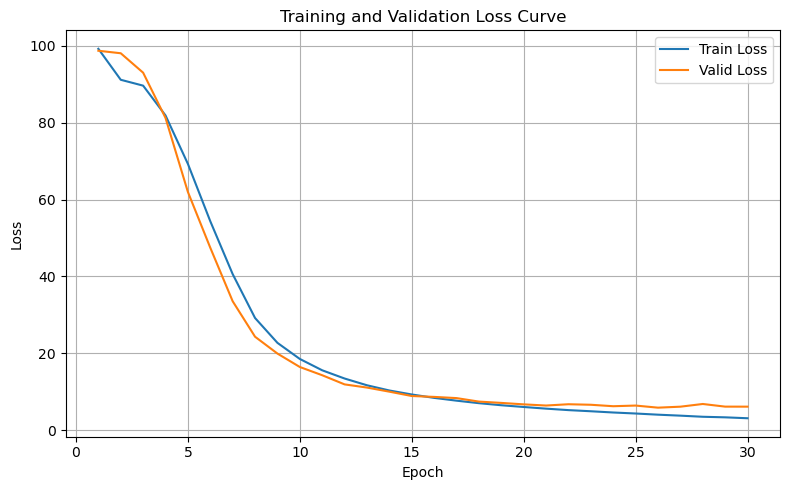

In [1]:
import re
import matplotlib.pyplot as plt

log_file = "/data/mingxu/Audio/Assignment_3/run.out"

epochs = []
train_loss = []
valid_loss = []

with open(log_file, "r", encoding="utf-8") as f:
    for line in f:
        # 匹配你的输出格式
        match = re.search(r"Epoch\s+(\d+)\s+Done\s+\|\s+Train Loss:\s*([\d\.]+)\s*\|\s+Valid Loss:\s*([\d\.]+)", line)
        if match:
            ep = int(match.group(1))
            tr = float(match.group(2))
            va = float(match.group(3))
            epochs.append(ep)
            train_loss.append(tr)
            valid_loss.append(va)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, valid_loss, label='Valid Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

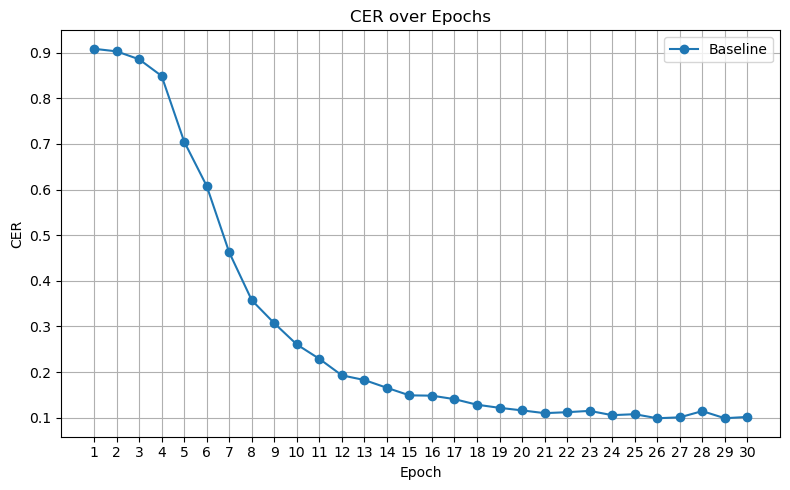

In [ ]:
import matplotlib.pyplot as plt

log_file = "/data/mingxu/Audio/Assignment_3/eval_baseline.log"

epoch_list = []
cer_list = []

with open(log_file, 'r', encoding='utf-8') as f:
    for line in f:
        if line.startswith("ckpt") or not line.strip():
            continue
        parts = line.strip().split()
        # 如果是tab分割，有些编辑器读出来parts长度可能>6，这里只用前两个
        ckpt = parts[0]
        cer = float(parts[1])
        # 提取 epoch id（model_XX.pt 里的XX）
        epoch_str = ckpt.replace("model_", "").replace(".pt", "")
        try:
            epoch = int(epoch_str)
            epoch_list.append(epoch)
            cer_list.append(cer)
        except ValueError:
            continue

# 按epoch排序
epoch_cer = sorted(zip(epoch_list, cer_list), key=lambda x: x[0])
epochs, cers = zip(*epoch_cer)

plt.figure(figsize=(8,5))
plt.plot(epochs, cers, marker='o', label="Baseline")
plt.xlabel("Epoch")
plt.ylabel("CER")
plt.title("CER over Epochs")
plt.grid(True)
plt.xticks(epochs)
plt.legend()
plt.tight_layout()
plt.show()

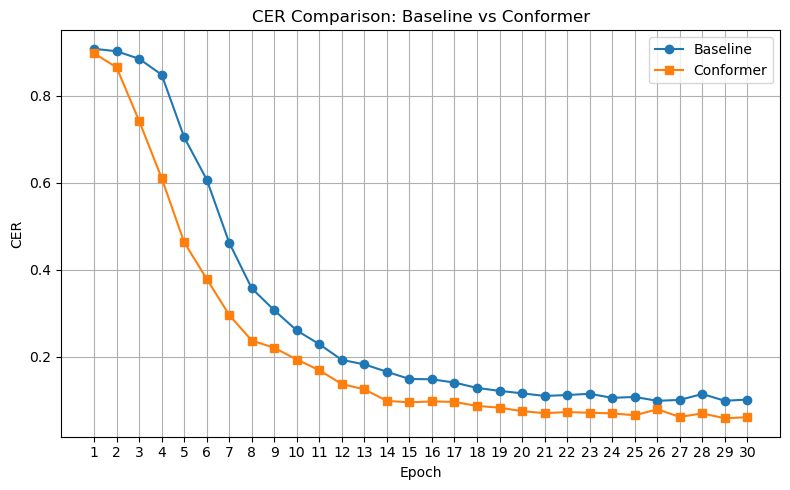

In [8]:
import matplotlib.pyplot as plt

def read_eval_log(log_file):
    epoch_list = []
    cer_list = []
    with open(log_file, 'r', encoding='utf-8') as f:
        for line in f:
            if line.startswith("ckpt") or not line.strip():
                continue
            parts = line.strip().split()
            ckpt = parts[0]
            cer = float(parts[1])
            epoch_str = ckpt.replace("model_", "").replace(".pt", "")
            try:
                epoch = int(epoch_str)
                epoch_list.append(epoch)
                cer_list.append(cer)
            except ValueError:
                continue
    # 按epoch排序
    epoch_cer = sorted(zip(epoch_list, cer_list), key=lambda x: x[0])
    if not epoch_cer:
        return [], []
    epochs, cers = zip(*epoch_cer)
    return list(epochs), list(cers)

# 路径
baseline_log = "/data/mingxu/Audio/Assignment_3/eval_baseline.log"
conformer_log = "/data/mingxu/Audio/Assignment_3/eval_conformer.log"

epochs1, cers1 = read_eval_log(baseline_log)
epochs2, cers2 = read_eval_log(conformer_log)

plt.figure(figsize=(8,5))
plt.plot(epochs1, cers1, marker='o', label="Baseline")
plt.plot(epochs2, cers2, marker='s', label="Conformer")
plt.xlabel("Epoch")
plt.ylabel("CER")
plt.title("CER Comparison: Baseline vs Conformer")
plt.grid(True)
plt.xticks(sorted(list(set(epochs1+epochs2))))
plt.legend()
plt.tight_layout()
plt.show()

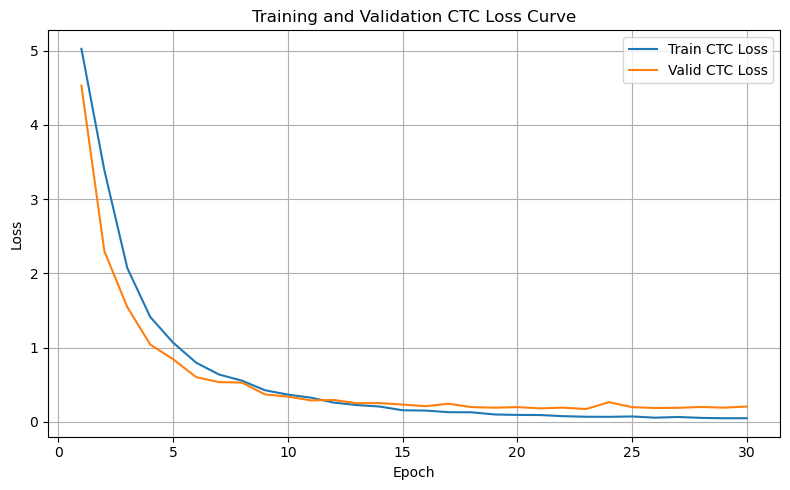

In [6]:
import re
import matplotlib.pyplot as plt

log_file = "/data/mingxu/Audio/Assignment_3/train2.out"

epochs = []
train_loss = []
valid_loss = []

with open(log_file, "r", encoding="utf-8") as f:
    cur_epoch = None
    cur_train = None
    cur_valid = None
    for line in f:
        m_epoch = re.search(r'FineTune Epoch\s+(\d+)\s+Done', line)
        m_train = re.search(r'Train CTC Loss:\s*([\d\.]+)', line)
        m_valid = re.search(r'Valid CTC Loss:\s*([\d\.]+)', line)
        if m_epoch:
            cur_epoch = int(m_epoch.group(1))
        elif m_train:
            cur_train = float(m_train.group(1))
        elif m_valid:
            cur_valid = float(m_valid.group(1))
            # 读到 valid loss 说明该 epoch 三个数据全到了，保存
            if cur_epoch is not None and cur_train is not None:
                epochs.append(cur_epoch)
                train_loss.append(cur_train)
                valid_loss.append(cur_valid)
            # 重置以等待下一个 epoch
            cur_epoch = None
            cur_train = None
            cur_valid = None

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Train CTC Loss')
plt.plot(epochs, valid_loss, label='Valid CTC Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation CTC Loss Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()